In [17]:
import sklearn.metrics as skm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from analysis_utils import *
from nlp_synt_data import *
from data.texts import *

In [18]:
df = pd.read_json('data/dbdump_testdb.jobs_v5.json')
df = df[df['company'].str.contains('ecco')]
df['description'].unique().tolist()

['Adecco Italia Spa, filiale di San Giovanni in Persiceto, ricerca per azienda cliente di San Giovanni in Persiceto, un/a: ADDETTO/A CATERING Responsabilità: - Organizzare e gestire il servizio di catering per eventi e occasioni speciali; - Supervisionare il personale addetto alla preparazione e alla distribuzione dei pasti; - Garantire il rispetto delle norme igienico-sanitarie; - Assicurarsi che gli standard di qualità siano sempre mantenuti. Requisiti: - Esperienza pregressa nel ruolo; - Capacità di lavorare in team; - Conoscenza delle norme igienico-sanitarie; - Disponibilità a lavorare nei wee-end e a svolgere straordinari. Si offre contratto iniziale in somministrazione, scopo assunzione. Orario di lavoro: Full-time dal Lunedì al Venerdì con disponibilità nei week-end.\n\nCCNL: Turismo - pubblici servizi, retribuzione 1500E lordi Disponibilità oraria: Full Time Patente: B Mezzo di trasporto: Auto,',
 "Opportunità: Hai la passione per il settore bancario? Candidati! Ricerchiamo pe

    count     %     df prompt_id           true
0  4465.0  1.00    raw     zsl#0      INCLUSIVO
0  4403.0  0.99  fixed     zsl#0      INCLUSIVO
0  1330.0  1.00    raw     zsl#0  NON INCLUSIVO
0  1315.0  0.99  fixed     zsl#0  NON INCLUSIVO
0   566.0  1.00    raw     fsl#0      INCLUSIVO
0   566.0  1.00  fixed     fsl#0      INCLUSIVO
0   189.0  1.00    raw     fsl#0  NON INCLUSIVO
0   189.0  1.00  fixed     fsl#0  NON INCLUSIVO


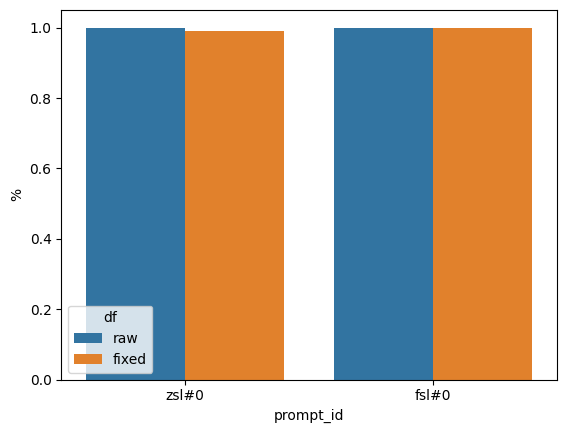

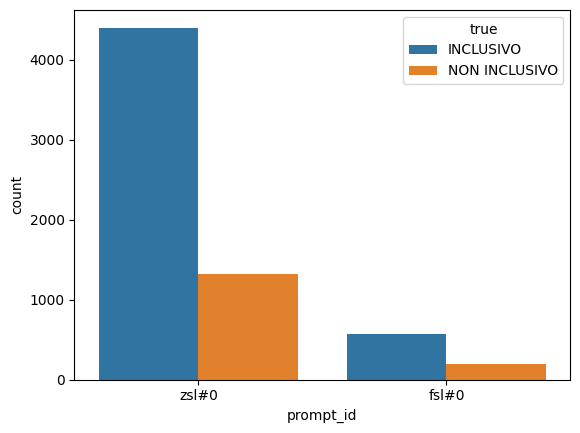

,prompt_id,text_id,text_labels,response,text_JOB_value,text_JOB_label,true
0,zsl#0,t#0_JOB#0,TODO,NON INCLUSIVO,giornaista,neutro,INCLUSIVO
1,zsl#0,t#0_JOB#1,TODO,NON INCLUSIVO,autista,neutro,INCLUSIVO
2,zsl#0,t#0_JOB#2,TODO,NON INCLUSIVO,dentista,neutro,INCLUSIVO
3,zsl#0,t#0_JOB#3,TODO,NON INCLUSIVO,ginnasta,neutro,INCLUSIVO
4,zsl#0,t#0_JOB#4,TODO,NON INCLUSIVO,consulente,neutro,INCLUSIVO
...,...,...,...,...,...,...,...
6545,fsl#0,t#36_JOB#39,INCLUSIVO,NON INCLUSIVO,camerier*,neutro,INCLUSIVO
6546,fsl#0,t#36_JOB#40,INCLUSIVO,INCLUSIVO,cameriere/a,neutro,INCLUSIVO
6547,fsl#0,t#36_JOB#41,INCLUSIVO,NON INCLUSIVO,camerierÃ,neutro,INCLUSIVO
6548,fsl#0,t#36_JOB#42,INCLUSIVO,INCLUSIVO,cameriere/cameriera,neutro,INCLUSIVO


In [19]:
model = 'mistral'
model = 'gemma2'
model = 'qwen2'
df = pd.read_csv(f'results/{model}_split.csv')

df_fix = fix_df(df, model)
df_fix

In [20]:
print(df_fix['true'].value_counts())
print(df_fix['response'].value_counts())

true
INCLUSIVO        4969
NON INCLUSIVO    1504
Name: count, dtype: int64
response
NON INCLUSIVO    4101
INCLUSIVO        2372
Name: count, dtype: int64


<>:27: SyntaxWarning: invalid escape sequence '\*'
<>:27: SyntaxWarning: invalid escape sequence '\*'
C:\Users\romabob\AppData\Local\Temp\ipykernel_8088\2790301019.py:27: SyntaxWarning: invalid escape sequence '\*'
  for s in ['Ã',' e ',' o ','\*','/']:


zsl#0


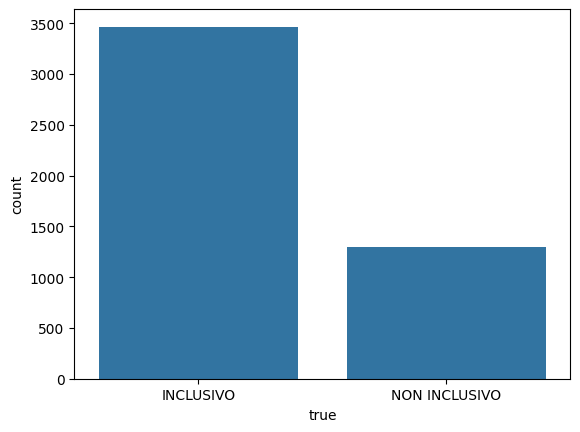

C:\Users\romabob\AppData\Local\Temp\ipykernel_8088\2790301019.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])
C:\Users\romabob\AppData\Local\Temp\ipykernel_8088\2790301019.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])


   total  true_positives  true_negatives  false_positives  false_negatives  \
0   5718        0.343127        0.207240         0.022735         0.426898   
0   4760        0.351681        0.246849         0.025210         0.376261   
0    958        0.300626        0.010438         0.010438         0.678497   
0    420        0.080952        0.000000         0.000000         0.919048   
0    490        0.042857        0.000000         0.000000         0.957143   
0    105        0.885714        0.000000         0.000000         0.114286   
0    945        0.541799        0.000000         0.000000         0.458201   
0    595        0.643697        0.000000         0.000000         0.356303   
0    875        0.715429        0.000000         0.000000         0.284571   

   sensitivity  specificity  accuracy  precision        f1  \
0     0.445605     0.901141  0.550367   0.937859  0.604157   
0     0.483117     0.907336  0.598529   0.933110  0.636623   
0     0.307036     0.500000  0.31

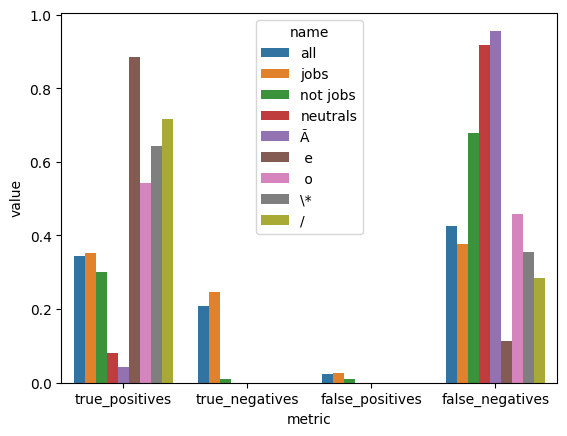

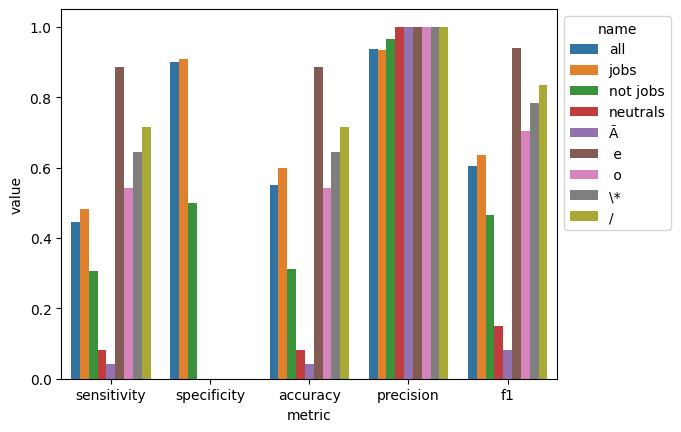

fsl#0


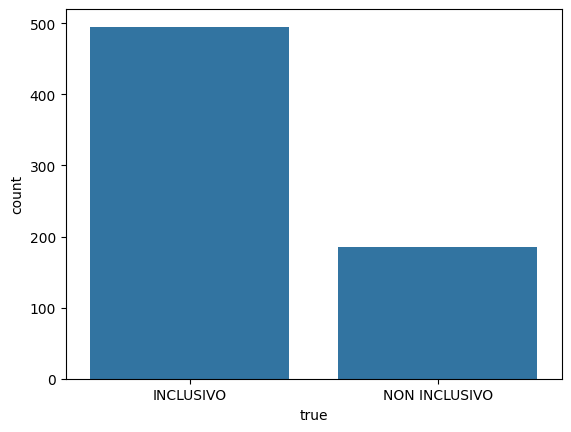

   total  true_positives  true_negatives  false_positives  false_negatives  \
0    755        0.325828        0.205298         0.045033         0.423841   
0    680        0.317647        0.223529         0.048529         0.410294   
0     75        0.400000        0.040000         0.013333         0.546667   
0     60        0.066667        0.000000         0.000000         0.933333   
0     70        0.242857        0.000000         0.000000         0.757143   
0     15        0.600000        0.000000         0.000000         0.400000   
0    135        0.362963        0.000000         0.000000         0.637037   
0     85        0.388235        0.000000         0.000000         0.611765   
0    125        0.824000        0.000000         0.000000         0.176000   

   sensitivity  specificity  accuracy  precision        f1  \
0     0.434629     0.820106  0.531126   0.878571  0.581560   
0     0.436364     0.821622  0.541176   0.867470  0.580645   
0     0.422535     0.750000  0.44

C:\Users\romabob\AppData\Local\Temp\ipykernel_8088\2790301019.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])
C:\Users\romabob\AppData\Local\Temp\ipykernel_8088\2790301019.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])


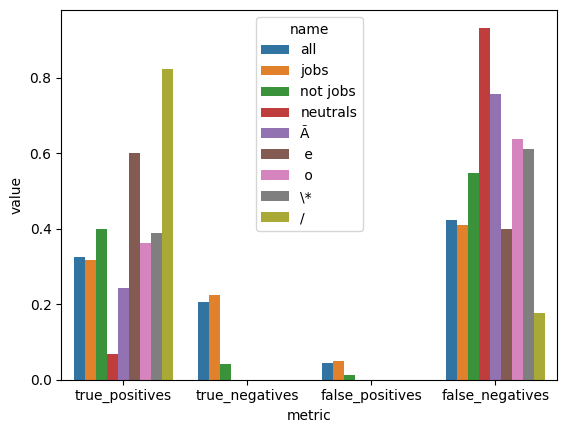

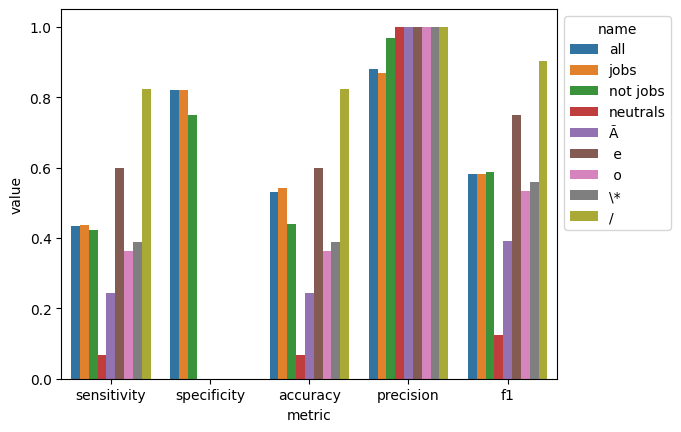

In [21]:
for p in df_fix['prompt_id'].unique():
    print(p)

    _df = df_fix[df_fix['prompt_id'] == p]
    df_jobs = _df[_df['text_labels'] == 'TODO']
    df_notjobs = _df[_df['text_labels'] != 'TODO']
    
    sns.countplot(data=df_jobs, x='true')
    plt.show()

    all = metrics(_df)
    all['name'] = 'all'
    res_df = pd.DataFrame(all, index=[0])

    _metrics = metrics(df_jobs)
    _metrics['name'] = 'jobs'
    res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])

    _metrics = metrics(df_notjobs)
    _metrics['name'] = 'not jobs'
    res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])

    _metrics = metrics(isin(df_jobs, NEUTRALS))
    _metrics['name'] = 'neutrals'
    res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])

    for s in ['Ã',' e ',' o ','\*','/']:
        _metrics = metrics(contains(df_jobs, [s]))
        _metrics['name'] = s
        res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])

    print(res_df)

    res_df_melt = res_df.melt(id_vars=['name'], var_name='metric', value_name='value')
    sns.barplot(data=res_df_melt[res_df_melt['metric'].isin([
        'true_positives',
        'true_negatives',
        'false_positives',
        'false_negatives',
    ])], x='metric', y='value', hue='name')
    plt.show()

    ax = sns.barplot(data=res_df_melt[res_df_melt['metric'].isin([
        'sensitivity',
        'specificity',
        'accuracy',
        'precision',
        'f1',
        # 'negative_predictive_value',
    ])], x='metric', y='value', hue='name')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()